In [21]:
import os
import time
from collections import defaultdict
from pathlib import Path
from openai import OpenAI
import matplotlib.pyplot as plt
from mutagen.mp3 import MP3

client = OpenAI(api_key=os.getenv("OPENAI_KEY"))

input_text = """
My, občané České republiky v Čechách, na Moravě a ve Slezsku,
v čase obnovy samostatného českého státu,
věrni všem dobrým tradicím dávné státnosti zemí Koruny české i státnosti československé,
odhodláni budovat, chránit a rozvíjet Českou republiku
v duchu nedotknutelných hodnot lidské důstojnosti a svobody
"""


def get_mp3_length(file_path):
    audio = MP3(file_path)
    return audio.info.length

num_runs = 3
sleep_between_s = 60

models = ["tts-1-hd", "tts-1"]

voices = ["alloy"]
voices = ["alloy", "echo", "fable", "onyx", "nova", "shimmer"]

time_measurements = defaultdict(list)
audio_length = defaultdict(list)

for i in range(0, num_runs):
    for model in models:
        for voice in voices:

                test_name = f"{model}_{voice}"

                speech_file_path = Path("./") / "output" / f"{test_name}.mp3"
                start_time = time.time()
                response = client.audio.speech.create(
                  model=model,
                  voice=voice,
                  input=input_text
                )
                end_time = time.time()
                download_time = end_time - start_time

                time_measurements[test_name].append(download_time)

                response.write_to_file(speech_file_path)

                audio_time = get_mp3_length(speech_file_path)
                audio_length[test_name].append(audio_time)

    time.sleep(sleep_between_s)

print(time_measurements)
print(audio_length)

defaultdict(<class 'list'>, {'tts-1-hd_alloy': [5.130421876907349, 5.113274812698364, 5.736272096633911], 'tts-1-hd_echo': [5.632728815078735, 4.673932075500488, 25.858553886413574], 'tts-1-hd_fable': [5.065288305282593, 24.67050290107727, 4.895749807357788], 'tts-1-hd_onyx': [25.20425295829773, 25.292577028274536, 25.480352878570557], 'tts-1-hd_nova': [4.826904058456421, 25.106239080429077, 25.68100094795227], 'tts-1-hd_shimmer': [25.448550939559937, 4.959289789199829, 25.825175762176514], 'tts-1_alloy': [3.925729990005493, 4.145396947860718, 4.770794868469238], 'tts-1_echo': [4.253563165664673, 3.830338716506958, 3.8730030059814453], 'tts-1_fable': [4.229598045349121, 4.09841775894165, 4.083607912063599], 'tts-1_onyx': [4.16775918006897, 4.433181047439575, 4.278800010681152], 'tts-1_nova': [4.443953037261963, 4.038050174713135, 4.793586254119873], 'tts-1_shimmer': [4.548979043960571, 3.5596821308135986, 3.824096918106079]})
defaultdict(<class 'list'>, {'tts-1-hd_alloy': [20.784, 20.8

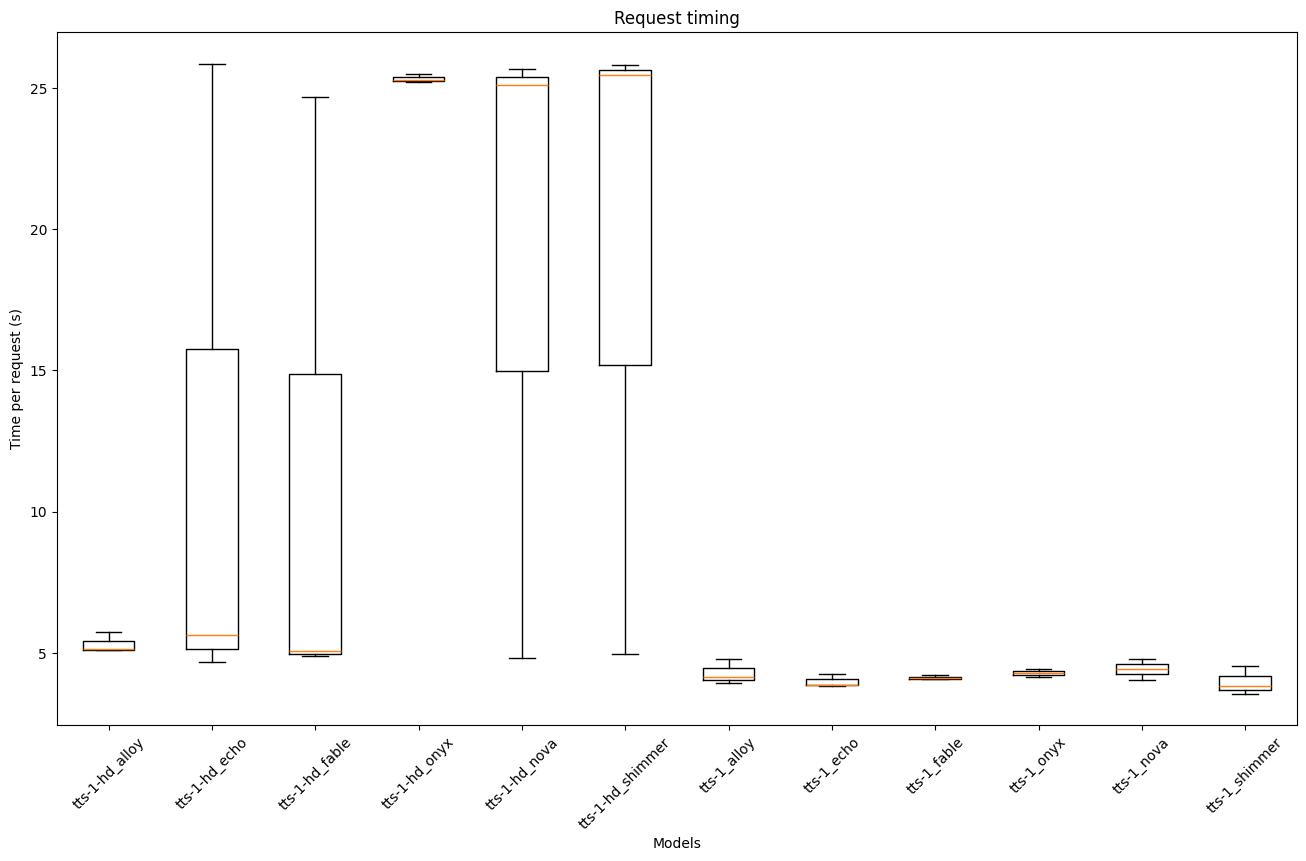

In [26]:
plt.figure(figsize=(16, 9))
plt.boxplot(list(time_measurements.values()), labels=list(time_measurements.keys()))

plt.xlabel('Models')
plt.ylabel('Time per request (s)')
plt.xticks(rotation=45)

plt.title('Request timing')
plt.savefig("timing.png")

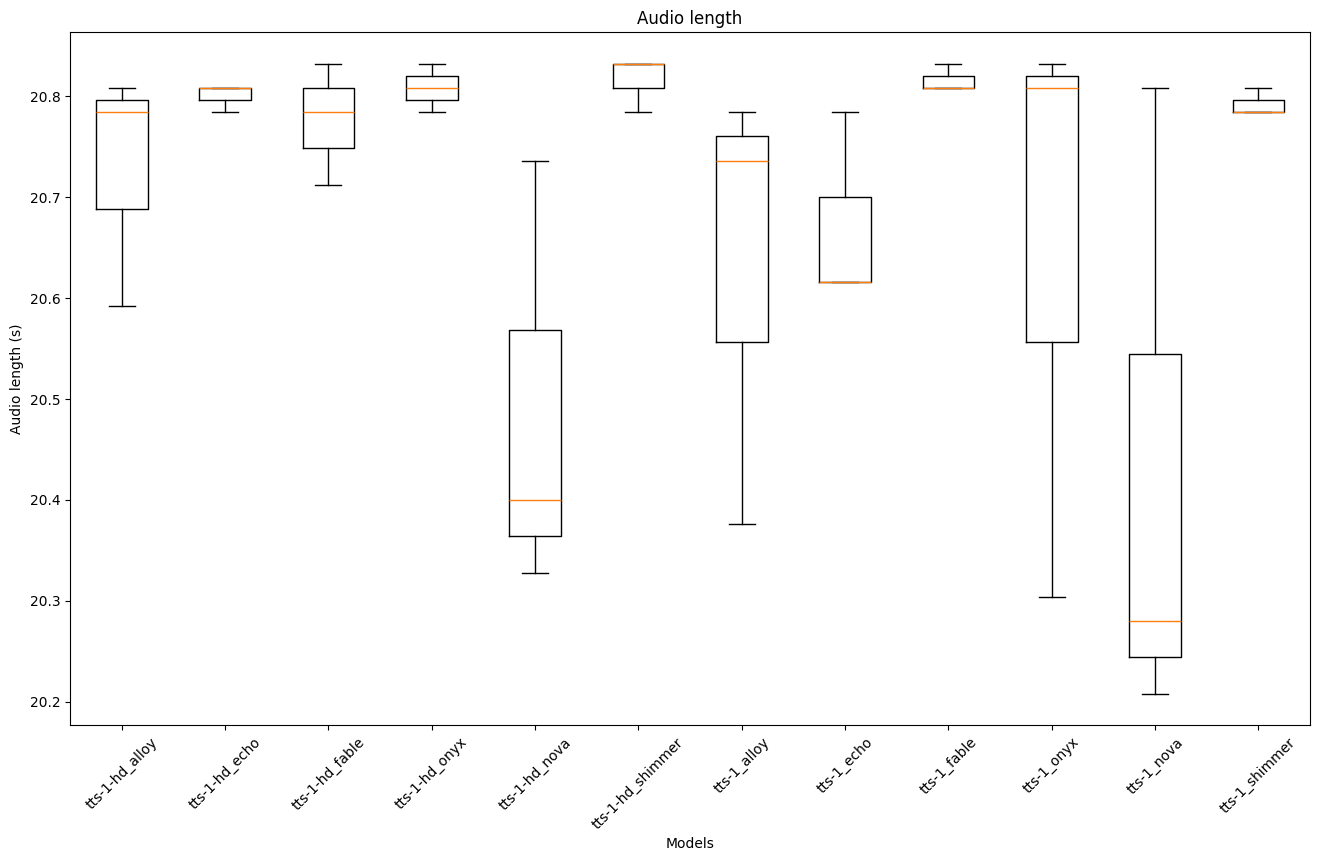

In [27]:
plt.figure(figsize=(16, 9))
plt.boxplot(list(audio_length.values()), labels=list(audio_length.keys()))

plt.xlabel('Models')
plt.ylabel('Audio length (s)')
plt.xticks(rotation=45)

plt.title('Audio length')
plt.savefig("length.png")